# Import

In [2]:
# basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [64]:
# # data visualization
# import seaborn as sns
# import matplotlib.colors as mat_colors
# from mpl_toolkits.mplot3d import Axes3D
# from autoviz.AutoViz_Class import AutoViz_Class
# from IPython.display import SVG

In [8]:
import spacy
import re

In [66]:
link_train = "https://raw.githubusercontent.com/Pieter414/Projects/main/dataset_penyisihan_bdc_2024(in).csv"
link_test = "https://raw.githubusercontent.com/Pieter414/Projects/main/dataset_unlabeled_penyisihan_bdc_2024(in).csv"

In [67]:
train_df = pd.read_csv(link_train, delimiter=";")
test_df = pd.read_csv(link_test, delimiter=";")

# Overview

In [68]:
train_df

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan


In [69]:
test_df

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


In [70]:
print(train_df.shape)
print(test_df.shape)

(5000, 2)
(1000, 2)


In [71]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IDText  1000 non-null   object
 1   Text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [72]:
train_df.describe()

,text,label
count,5000,5000
unique,4583,8
top,RT Abah Anies ingin mengangkat martabat petani...,Politik
freq,42,2972


In [73]:
test_df.describe()

,IDText,Text
count,1000,1000
unique,1000,1000
top,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
freq,1,1


In [74]:
train_df.isna().sum()

text     0
label    0
dtype: int64

In [75]:
train_df.duplicated().sum()

381

In [76]:
test_df.duplicated().sum()

0

In [77]:
train_df[train_df.duplicated()]

,text,label
57,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
104,"RT Anak Muda Indonesia, the future of this nat...",Ideologi
145,"RT Pupuk bersubsidi langka, Tim Prabowo Gibran...",Ekonomi
146,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
189,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
...,...,...
4917,"RT Ini kejam, warga disitu sudah bersedia diba...",Sosial Budaya
4933,RT Karena program pak anies yg ini. Bapak gw j...,Sumber Daya Alam
4955,RT Ekonom: Program Makan Siang dan Susu Gratis...,Ekonomi
4971,"RT menjelang tengah malam ini, aku mau ucapkan...",Ideologi


In [78]:
all_duplicated_texts = train_df[train_df['text'].duplicated(keep=False)]

print("\nDetailed comparison of duplicated text entries:")
grouped = all_duplicated_texts.groupby('text')
for name, group in grouped:
    print(f"\nText: {name}")
    print(group)


Detailed comparison of duplicated text entries:

Text: @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= @gqAL2HIcdWKR2U/VFUq3R0TFxXxtxCsKyUXAKn9R5o0= Iya nih penting suara Batak sebagai populasi etnis ketiga terbesar setelah Jawa Sunda. Mayoritas Batak Kristen cukup anti sama Anies karena diframing radikal sejak
                                                   text      label
1967  @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...  Demografi
3844  @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...  Demografi

Text: Adi menginformasikan bahwa isu utama di kampung mereka adalah sulitnya mendapatkan air bersih dan masalah naiknya air laut. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto
                                                   text             label
1028  Adi menginformasikan bahwa isu utama di kampun...  Sumber Daya Alam
1311  Adi menginformasikan bahwa isu utama di kampun...  Sumber Daya Alam
2644  Adi menginformasikan bahwa isu utama di

In [79]:
train_df.nunique()

text     4583
label       8
dtype: int64

# Preprocessing

In [80]:
df_drop_duplicate= train_df.drop_duplicates(subset='text')

In [81]:
df_drop_duplicate.duplicated().sum()

0

In [82]:
df_drop_duplicate.shape

(4583, 2)

<ipython-input-83-9e82cca025e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate['length']=df_drop_duplicate['text'].apply(len)


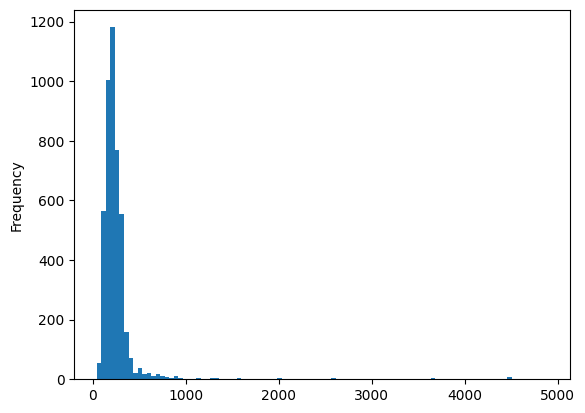

In [83]:
#mencari tau panjang text
df_drop_duplicate['length']=df_drop_duplicate['text'].apply(len)

df_drop_duplicate['length'].plot(bins=100, kind='hist')
plt.show()

In [84]:
df_drop_duplicate.describe()

,length
count,4583.000000
mean,262.575387
std,307.668081
min,45.000000
25%,168.000000
50%,214.000000
75%,275.000000
max,4893.000000


In [85]:
df_drop_duplicate[df_drop_duplicate['length'] == 45]['text'].iloc[0]

'pak anies tolong ijinin shopee cina jualan lg'

In [86]:
#Mencari hastags
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

train_df['hashtags'] = train_df['text'].apply(extract_hashtags)

hashtag_counts = train_df.groupby('label')['hashtags'].apply(lambda x: pd.Series(x.sum()).value_counts())

hashtag_table = hashtag_counts.unstack(fill_value=0)

print(hashtag_table)

                         02BangunIndustriKarbon  02KampanyeRamahLingkungan  \
label                                                                        
Demografi                                     0                          0   
Ekonomi                                       0                          0   
Geografi                                      0                          0   
Ideologi                                      0                          0   
Pertahanan dan Keamanan                       0                          0   
Politik                                       1                          0   
Sosial Budaya                                 0                          0   
Sumber Daya Alam                              0                          2   

                         02MakinSulitDisusul  02Melanjutkan  \
label                                                         
Demografi                                  0              2   
Ekonomi                       

## Next Preprocess

## Hapus huruf kecil, angka, pattern, @ username, rt, simbol dkk

In [87]:
def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    #text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'\[.*?\]', '', text)  # Hapus [[pattern]
    text = re.sub(r'@[a-zA-Z0-9+/]+=', '', text) # Hapus yang gak jelas (@asdadaidajsda=)
    text = re.sub(r'\brt\b', '', text)# hapus rt
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Hapus simbol aneh
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih

    return text
label = df_drop_duplicate['label']
df_clean = df_drop_duplicate['text'].apply(clean_text)
df_clean_label = pd.concat([df_clean, label], axis=1)
for text, label in zip(df_clean_label['text'].iloc[0:10], df_clean_label['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik indonesiasentris indonesiahijau 02melanjutkan anakmudaindonesiaemas prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi aminmiskinkankoruptor

Label: Demografi
Text: emng bener sih pendukung 01 ada yg goblok begitu jg dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik klo 01 mayoritas pendidikan menengah atas artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah de

In [88]:
def print_df(df):
  for text, label in zip(df['text'].iloc[0:10], df['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

## cleaning label

In [89]:
label = df_drop_duplicate['label']

In [90]:
df_clean = df_drop_duplicate['text'].apply(clean_text)

In [91]:
df_clean_label = pd.concat([df_clean, label], axis=1)

In [92]:
for text, label in zip(df_clean_label['text'].iloc[0:10], df_clean_label['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik indonesiasentris indonesiahijau 02melanjutkan anakmudaindonesiaemas prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi aminmiskinkankoruptor

Label: Demografi
Text: emng bener sih pendukung 01 ada yg goblok begitu jg dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik klo 01 mayoritas pendidikan menengah atas artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah de

In [93]:
#Buat membandingkan ini raw text
for text, label in zip(train_df['text'].iloc[0:10], train_df['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

Label: Sumber Daya Alam
Text: Kunjungan Prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto

Label: Politik
Text: RT Anies dapat tepuk tangan meriah saat jadi Rektor mewajibkan mata kuliah anti-korupsi untuk memutus mata rantai korupsi.. #AminMiskinkanKoruptor https://t.co/hgXsoQGaEa [RE ekowboy2]

Label: Demografi
Text: @CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= emng bener sih, pendukung 01 ada yg goblok, begitu jg dg pendukung 02.. hnya sj menurut pak Ridwan Kamil skemanya terbalik, klo 01 MAYORITAS PENDIDIKAN MENENGAH ATAS (artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7Q= Sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua, giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras. Apakah ini tidak standar ganda

## Analysis clean data

In [94]:
for text, label in zip(df_clean_label['text'].iloc[0:10], df_clean_label['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik indonesiasentris indonesiahijau 02melanjutkan anakmudaindonesiaemas prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi aminmiskinkankoruptor

Label: Demografi
Text: emng bener sih pendukung 01 ada yg goblok begitu jg dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik klo 01 mayoritas pendidikan menengah atas artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah de

In [95]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Unduh daftar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
from collections import Counter

df_clean_label['temp_list'] = df_clean_label['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_clean_label['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,dan,2620
1,yang,2337
2,di,2002
3,anies,1994
4,ganjar,1957
5,prabowo,1671
6,untuk,1170
7,pak,1091
8,ini,1072
9,pranowo,1020


In [97]:
# Daftar stopwords bahasa Indonesia (tambahkan kata-kata yang ingin dihapus)
stop_words = set(stopwords.words('indonesian'))
custom_stop_words = {'dan', 'di', 'dll', 'yg', 'jnk', 'capres', 'negara'}
stop_words = stop_words.union(custom_stop_words)

# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [98]:
# Terapkan fungsi ke kolom teks
df_clean_label['text'] = df_clean_label['text'].apply(remove_stopwords)

print_df(df_clean_label)

Label: Sumber Daya Alam
Text: kunjungan prabowo meresmikan menyerahkan proyek bantuan air bersih titik indonesiasentris indonesiahijau 02melanjutkan anakmudaindonesiaemas prabowo subianto

Label: Politik
Text: anies tepuk tangan meriah rektor mewajibkan mata kuliah antikorupsi memutus mata rantai korupsi aminmiskinkankoruptor

Label: Demografi
Text: emng bener sih pendukung 01 goblok jg dg pendukung 02 hnya sj ridwan kamil skemanya terbalik klo 01 mayoritas pendidikan menengah jg pendidikan rendah milih

Label: Politik
Text: anies bersikap kritis kinerja prabowo dianggap engga sopan dianggap menghormati orang tua giliran skrg gibran tengil sok kritis dianggap kritis keras standar ganda

Label: Politik
Text: anies baswedan harap asn tni polri pegang sumpahnya pemilu

Label: Politik
Text: duh lurah denger nih acara hajatan rakyat puluhan ribu warga kendal serukan ganjar presiden kehadiran magnet puluhan ribu warga menghadiri hajatan rakyat ganjarmahfud besarnya antusiasme warga bukti jaw

In [99]:
df_clean_label

,text,label,temp_list
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,"[kunjungan, prabowo, ini, untuk, meresmikan, d..."
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,"[anies, dapat, tepuk, tangan, meriah, saat, ja..."
2,emng bener sih pendukung 01 goblok jg dg pendu...,Demografi,"[emng, bener, sih, pendukung, 01, ada, yg, gob..."
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,"[sewaktu, anies, bersikap, kritis, ke, kinerja..."
4,anies baswedan harap asn tni polri pegang sump...,Politik,"[anies, baswedan, harap, asn, termasuk, tni, d..."
...,...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,"[ngeliat, debat, kemaren, pas, prabowo, kicep,..."
4996,masyarakat prabowogibran memiliki visi sejalan...,Politik,"[masyarakat, yakin, bahwa, prabowogibran, memi..."
4997,imo both are irrational but irrational tbh but...,Ekonomi,"[imo, both, are, irrational, but, yg, satu, ja..."
4998,look at that ganjar sdh berkecimpung lgislatif...,Pertahanan dan Keamanan,"[look, at, that, pak, ganjar, anda, sdh, berke..."


## Melihat kata paling bayak dalam datset

In [100]:
from collections import Counter

df_clean_label['temp_list'] = df_clean_label['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_clean_label['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,anies,1994
1,ganjar,1957
2,prabowo,1671
3,pranowo,1020
4,mahfud,910
5,indonesia,655
6,ganjarpranowopilihanumat,638
7,ganjarmahfudrebound,560
8,md,513
9,presiden,464


In [101]:
from collections import Counter

df_clean_label['temp_list'] = df_clean_label['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_clean_label['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,anies,1994
1,ganjar,1957
2,prabowo,1671
3,pranowo,1020
4,mahfud,910
5,indonesia,655
6,ganjarpranowopilihanumat,638
7,ganjarmahfudrebound,560
8,md,513
9,presiden,464


hapus stop word seperti di , dan , dll

# Review

In [102]:
print(df_clean_label)

                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     emng bener sih pendukung 01 goblok jg dg pendu...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4995  ngeliat debat kemaren pas prabowo kicep kekira...   
4996  masyarakat prabowogibran memiliki visi sejalan...   
4997  imo both are irrational but irrational tbh but...   
4998  look at that ganjar sdh berkecimpung lgislatif...   
4999  acara memasak calon presiden nomor urut 2 meng...   

                        label  \
0            Sumber Daya Alam   
1                     Politik   
2                   Demografi   
3                     Politik   
4                     Politik   
...                       ...   
4995                  Politik   
4996                  Polit

In [3]:
df_clean_label = pd.read_csv("C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\Code\\EDA_Satdat2024\\cleaned_dataset_without_hash.csv")

## Standard Rude Word

In [5]:
rude_words = {
    "anjing":"",
    "anj":"",
    "bacot":"",
    "monyet":"",
    "babi":"",
    "goblok":"",
    "goblok-goblokin":"",
    "ngegoblok2in":"",
    "goblokgoblokin":"",
    "ngebacot":"ngatain",
}

In [10]:
def preprocess_rude_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = [rude_words.get(word, word) for word in words]

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)

    return cleaned_text

# Fungsi untuk memproses kolom teks dalam DataFrame
def preprocess_dataframe(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_rude_word)
    return df

# Memproses DataFrame
df_cleaned = preprocess_dataframe(df_clean_label, 'text')

print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo ini untuk meresmikan dan men...   
1     anies dapat tepuk tangan meriah saat jadi rekt...   
2     emng bener sih pendukung 01 ada yg begitu jg d...   
3     sewaktu anies bersikap kritis ke kinerja pak p...   
4     anies baswedan harap asn termasuk tni dan polr...   
...                                                 ...   
4578  ngeliat debat kemaren pas prabowo kicep kekira...   
4579  masyarakat yakin bahwa prabowogibran memiliki ...   
4580  imo both are irrational but yg satu jauh lebih...   
4581  look at that pak ganjar anda sdh berkecimpung ...   
4582  acara ini tidak hanya memasak tetapi calon pre...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4578                  Politik  
4579            

In [11]:
df_cleaned[df_cleaned['text'].str.contains('bacot')]

,text,label


## Filter KamusAlay

In [12]:
kamus_link = "https://raw.githubusercontent.com/Pieter414/Projects/main/kamusalay.csv"
kamus = pd.read_csv(kamus_link, delimiter=",", header=None).rename(columns={0:"alay", 1:"baku"})
kamus

,alay,baku
0,ajh,saja
1,ajj,saja
2,akoh,aku
3,amaca,ah masa
4,amuh,kamu
...,...,...
234,yaw,ya
235,yoi,iya
236,yups,ya
237,yupz,ya


In [13]:
kamus_dict = kamus.set_index('alay')['baku'].to_dict()
kamus_dict

{'ajh': 'saja',
 'ajj': 'saja',
 'akoh': 'aku',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'aph': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'aq': 'saya',
 'baryaw': 'sabar ya',
 'baryw': 'sabar ya',
 'bryaw': 'sabar ya',
 'bryw': 'sabar ya',
 'bay': 'selamat tinggal',
 'besoq': 'besok',
 'beud': 'banget',
 'bhay': 'selamat tinggal',
 'bisya': 'bisa',
 'biza': 'bisa',
 'bntr': 'sebentar',
 'bokap': 'ayah',
 'bkap': 'ayah',
 'bkp': 'ayah',
 'bokaps': 'ayah',
 'bokapz': 'ayah',
 'bs': 'bisa',
 'bsa': 'bisa',
 'bsk': 'besok',
 'bsoq': 'besok',
 'bte': 'bosan',
 'bozen': 'bosan',
 'bozn': 'bosan',
 'bzn': 'bosan',
 'bzen': 'bosan',
 'cabut': 'pergi',
 'caiank': 'sayang',
 'cekola': 'sekolah',
 'cekolah': 'sekolah',
 'celalaw': 'selalu',
 'celalu': 'selalu',
 'cemungudh': 'semangat',
 'cemungut': 'semangat',
 'cemunguth': 'semangat',
 'cibuq': 'sibuk',
 'cini': 'sini',
 'ciyus': 'serius',
 'cll': 'selalu',
 'cllu': 'selalu',
 'cllw': 'selalu',
 'cpe': 'capek',
 'cpee': 'capek',
 'cewe': 'cewek',
 

In [14]:
tambahan = {
    'abahanies':'bapak anies',
    'pesanuntukabah':'pesan untuk bapak',
    'spotabahanies':'spot bapak anies',
    'abahnya':'bapaknya',
    'abahswedan':'anies',
    'humaniessayangabah':'humanies sayang bapak',
    'hwaitingabahanies':'semangat bapak anies'
}

kamus_dict.update(tambahan)

In [17]:
def preprocess_alay_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        if word in kamus_dict:
            corrected_word = kamus_dict[word]
            corrected_words.append(corrected_word)
            # print(f"Changed '{word}' to '{corrected_word}'")  # Logging perubahan
        else:
            corrected_words.append(word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text


# Fungsi untuk memproses kolom teks dalam DataFrame
def preprocess_dataframe2(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_alay_word)
    return df

# Memproses DataFrame
df_cleaned = preprocess_dataframe2(df_clean_label, 'text')

print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo ini untuk meresmikan dan men...   
1     anies dapat tepuk tangan meriah saat jadi rekt...   
2     emng bener sih pendukung 01 ada yg begitu juga...   
3     sewaktu anies bersikap kritis ke kinerja pak p...   
4     anies baswedan harap asn termasuk tni dan polr...   
...                                                 ...   
4578  ngeliat debat kemaren pas prabowo kicep kekira...   
4579  masyarakat yakin bahwa prabowogibran memiliki ...   
4580  imo both are irrational but yg satu jauh lebih...   
4581  look at that pak ganjar anda sudah berkecimpun...   
4582  acara ini tidak hanya memasak tetapi calon pre...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4578                  Politik  
4579            

In [18]:
df_clean_label[df_clean_label['text'].str.contains('abah')]

,text,label
1781,gerakan pemuda kabah dukung tni di boyolali si...,Politik
1867,inilah foods station jkt kok bisa sih jkt mamp...,Ekonomi
2795,berbeda dengan yang dikatakan pak anies tetang...,Politik
3067,bahkan ganjar bilang kalo dia meragukan prabow...,Politik


In [19]:
df_cleaned[df_cleaned['text'].str.contains('abah')]

,text,label
1781,gerakan pemuda kabah dukung tni di boyolali si...,Politik
1867,inilah foods station jkt kok bisa sih jkt mamp...,Ekonomi
2795,berbeda dengan yang dikatakan pak anies tetang...,Politik
3067,bahkan ganjar bilang kalo dia meragukan prabow...,Politik


## Filter > 25 word

In [20]:
def check_long_words(text):
    words = text.split()
    return any(len(word) > 25 for word in words)

# Menerapkan fungsi ke DataFrame
df_clean_label['check_lupa_spasi'] = df_clean_label['text'].apply(check_long_words)

df_clean_label

,text,label,check_lupa_spasi
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,False
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik,False
2,emng bener sih pendukung 01 ada yg begitu juga...,Demografi,False
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik,False
4,anies baswedan harap asn termasuk tni dan polr...,Politik,False
...,...,...,...
4578,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,False
4579,masyarakat yakin bahwa prabowogibran memiliki ...,Politik,False
4580,imo both are irrational but yg satu jauh lebih...,Ekonomi,False
4581,look at that pak ganjar anda sudah berkecimpun...,Pertahanan dan Keamanan,False


In [22]:
kamus_long = {
    'munculfenomenapakbowo':'muncul fenomena bapak prabowo',
    'terukurganjarmahfudrebound':'terukur ganjar mahfud rebound',
    'ganjarpranowopilihanumat':'ganjar pranowo pilihan umat',
    'k5cwvm0ta1xpchveyhoebrkxuugg2':'',
    'indonesiakuatindonesiamaju':'indonesia kuat indonesia maju',
    'prabowogibran':'prabowo gibran',
    'diplomasiprogresif02':'diplomasi progresif 02',
    'industripertahananbelaprabowo':'industri pertahanan bela prabowo',
    'perempuanganjarmahfudrebound':'perempuan ganjar mahfud rebound',
    'prabowogibranmenangsatuputaran':'prabowo gibran menang satu putaran',
    'prabowogibran2024':'prabowo gibran 2024',
    'pahitmaniesalwayswithanies':'pahit manies always with anies',
    '02melanjutkan':'02 melanjutkan',
    '2024ganjarpranowopilihanumat':'2024 ganjar pranowo pilihan umat',
    'indonesiaganjarmahfudrebound':'indonesia ganjar mahfud rebound',
    'mendatangganjarmahfudrebound':'mendatang ganjar mahfud rebound',
    'bangsaganjarpranowopilihanumat':'bangsa ganjar pranowo pilihan umat',
    'ganjarpranowopilihanumat2024':'ganjar pranowo pilihan umat 2024',
    'ganjarpranowopranowopilihanumat':'ganjar pranowo prabowo pilihan umat',
    'jokowiganjarmahfudrebound':'jokowi ganjar mahfud rebound',
    'rfk3fa9s5b8mqjhtm8ihhjsjgbmg6wuitrqadill':'',
    'kecilganjarpranowopilihanumat':'kecil ganjar pranowo pilihan umat',
    'ganjarmahfudrebound':'ganjar mahfud rebound',
    'ganjarpranowopranowopilihanumat2024':'ganjar pranowo prabowo pilihan umat 2024',
    'pranowoganjarmahfudrebound':'pranowo ganjar mahfud rebound',
    '2024jokowidigantiganjar':'2024 jokowi diganti ganjar',
    'negaraganjarpranowopilihanumat':'negara ganjar pranowo pilihan umat',
    'perempuanganjarpranowopranowopilihanumat':'perempuan ganjar pranowo pranowo pilihan umat',
    'pancasilaganjarmahfudrebound':'pancasila ganjar mahfud rebound',
    'iniganjarpranowopilihanumat':'ini ganjar pranowo pilihan umat',
    
}

In [23]:
def preprocess_long_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = kamus_long.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe3(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_long_word)
    return df

# Memproses DataFrame
df_clean_label = preprocess_dataframe3(df_clean_label, 'text')

print("Cleaned DataFrame:")
print(df_clean_label)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo ini untuk meresmikan dan men...   
1     anies dapat tepuk tangan meriah saat jadi rekt...   
2     emng bener sih pendukung 01 ada yg begitu juga...   
3     sewaktu anies bersikap kritis ke kinerja pak p...   
4     anies baswedan harap asn termasuk tni dan polr...   
...                                                 ...   
4578  ngeliat debat kemaren pas prabowo kicep kekira...   
4579  masyarakat yakin bahwa prabowo gibran memiliki...   
4580  imo both are irrational but yg satu jauh lebih...   
4581  look at that pak ganjar anda sudah berkecimpun...   
4582  acara ini tidak hanya memasak tetapi calon pre...   

                        label  check_lupa_spasi  
0            Sumber Daya Alam             False  
1                     Politik             False  
2                   Demografi             False  
3                     Politik             False  
4                     

In [24]:
df_clean_label['check_lupa_spasi'] = df_clean_label['text'].apply(check_long_words)

In [25]:
df_clean_label[df_clean_label['check_lupa_spasi']]

,text,label,check_lupa_spasi
882,setuju sekali cara masbowogbran pilihankita me...,Demografi,True
894,benar sekali optimis pbowogbran mumpuni mengel...,Ekonomi,True
950,catatan digital gusdur tentang cak imin megawa...,Sosial Budaya,True
1172,kita kagum masbowogbran palingtepat mengajak s...,Politik,True
1373,deputi politik 50 tim pemenangan nasional tpn ...,Politik,True
1961,di tanya strategi terkait tambang ilegal di ja...,Sumber Daya Alam,True
2480,padahal kalian sendiri sudah bergabung duluan ...,Politik,True
2499,setuju sekali semua yakin cuma kitatetap pbowo...,Politik,True
2839,that said poinpoin terkuat malam ini masih dar...,Politik,True
3093,benar sekali optimis pbowogbran mampu mengelol...,Ekonomi,True


In [26]:
df_clean_label.to_csv('cleaned_without_hash.csv', index=False)

# try model

In [117]:
# df_clean_label

In [118]:
# !pip install Sastrawi

In [119]:
# import pandas as pd
# import nltk
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report

In [120]:
# # Initialize Sastrawi stemmer
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

In [121]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report

# # Example labels for the text (for demonstration purposes)
# labels = [0, 1, 2, 3, 4, 5, 6, 7]  # Replace with actual labels for your dataset

# # Vectorize the text data
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df_clean_label['text'])

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# # Initialize and train the Naive Bayes classifier
# clf = MultinomialNB()
# clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = clf.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

In [122]:
# df_clean_label.shape

In [123]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report

# # Misalnya, ini adalah DataFrame yang sudah diproses
# # df = pd.read_csv('processed_data.csv')  # Contoh jika membaca dari file CSV

# # Pastikan labelnya sesuai dengan panjang DataFrame
# labels = [0, 1, 1]  # Contoh label, sesuaikan dengan data Anda

# # Vectorize the text data
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(train_df['text'])

# # Convert labels to a numpy array
# labels = np.array(labels)

# # Check the shape of X and labels
# print(f"Shape of X: {X.shape}")
# print(f"Shape of labels: {labels.shape}")

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# # Initialize and train the Naive Bayes classifier
# clf = MultinomialNB()
# clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = clf.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))
